# Exponentially decaying averages
Exponentially decaying averages is an important concept that let us "compress" the average or past operations without the need to retain memory of the past operations. We can visualize this as a smoothing technique that help us to reduce noise when dealing with batchs of data.
The basic form of an exponentialy decaying average is of the form:
$$ v_t = \beta v_{t} + (1 - \beta) v_{t-1} $$
Where $\beta$ is a smoothing parameter that lets you define how much of the past sata you want to remember to make the smoothing.

## Decaying average
The decaying average is a technique that allows you to reduce noise in data. The behavior of this algorithm is governef by the $\beta$ parameter such that:
$$
0 \geq \beta \geq 1
$$
The closest $\beta$ gets to 0 the smmothed applied average gets stronger. As well as $\beta$ approaches to 1 the data gets less smoothed. 

To illustrate the effect of $\beta$ parameter in weight decay, we will use a part of the dataset https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities?select=city_temperature.csv. In this version of the dataset we will use the temperatures of Madird in 1995.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
madrid = pd.read_csv('./Data/city_temperatures/madrid_1995.csv')

In [43]:
madrid.head()

,Unnamed: 0,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,921973,Europe,Spain,NaN,Madrid,1,1,1995,45.9
1,921974,Europe,Spain,NaN,Madrid,1,2,1995,40.0
2,921975,Europe,Spain,NaN,Madrid,1,3,1995,34.1
3,921976,Europe,Spain,NaN,Madrid,1,4,1995,37.0
4,921977,Europe,Spain,NaN,Madrid,1,5,1995,43.1


In [29]:
temperature_sorted = madrid.sort_values(by=['Month', 'Day']).AvgTemperature.values

## Decaying weights algorithm

In [30]:
def getDecayingAverage(data, beta=0.9):
    smoothed_values = []
    v_previous = data[0]
    for temperature in data[1:]:
        smoothed_values.append(v_previous)
        v_previous = beta*temperature + (1-beta)*v_previous
    smoothed_values.append(v_previous)
    return smoothed_values

In [39]:
def plotFunctions(title, functions, x = None, savefile=None, ylim=(35, 100)):
    if not x:
        x = np.linspace(-5, 5, 300)
    fig, ax = plt.subplots()
    
    legends = []
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    color_index = 0
    for f in functions:
        legends.append("y=" + f[0])
        y = f[1](x)
        if(color_index == len(colors)):
            color_index = 0
        ax.plot(x,y,color=colors[color_index], alpha=0.5)
        color_index += 1
    ax.set(xlabel='Day', ylabel='Temperature', title=title)
    plt.xlim([x[0],x[-1]])
    plt.ylim([ylim[0], ylim[1]])
    ax.legend(legends)
    plt.grid(True)
    
    if savefile:
        plt.savefig(savefile + '.png')
    plt.show()

In [40]:
smoothed_values_5 = getDecayingAverage(temperature_sorted, 0.5)
smoothed_values_1 = getDecayingAverage(temperature_sorted, 0.1)
r = lambda x: temperature_sorted
beta_5 = lambda x: smoothed_values_5
beta_1 = lambda x: smoothed_values_1

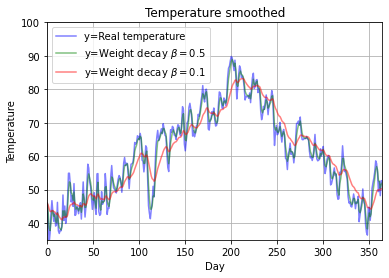

In [41]:
plotFunctions(r'Temperature smoothed', [(r'Real temperature', r), (r'Weight decay $\beta=0.5$', beta_5), (r'Weight decay $\beta=0.1$', beta_1)], range(len(temperature_sorted)), "smoothing")